In [485]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [486]:
img=cv.imread('tc2-3.png')
img.shape
#removing border from image .
img=img[40:760,50:550]

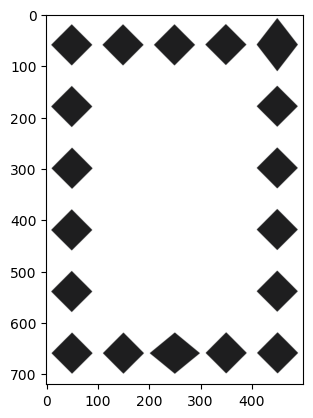

In [487]:
plt.imshow(img)

In [488]:
def finddiagolength(img):
    # Detecting edges
    grayimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    edges = cv.Canny(grayimg, 100, 200)
    height, width = edges.shape
    
    # Finding the coordinate of leftmost point of the leftmost square
    list1 = [width]
    row = None

    for i in range(100):
        for j in range(width):
            if edges[i, j] == 255:
                if j < list1[0]:
                    list1[0] = j
                    row = i  # Store the current row index

    # Finding horizontal diagonal end points of squares of horizontal row by detecting color change
    list2 = [0]
    counter = 0
    for j in range(width):
        value = int(edges[row, j] - edges[row, list2[counter]])
        if value != 0:
            counter += 1
            list2.append(j)

    # Finding the length of horizontal diagonal of each square
    list3 = []
    for n in range(5):
        length = int(list2[4 * n + 3]) - int(list2[4 * n + 2])
        list3.append(length)

    return list3

In [489]:
list3=finddiagolength(img)
if max(list3)-min(list3)<10:
    img = cv.rotate(img, cv.ROTATE_180)
    list3=finddiagolength(img)

<ipython-input-488-64c066435702>:22: RuntimeWarning: overflow encountered in scalar subtract
  value = int(edges[row, j] - edges[row, list2[counter]])


In [490]:
list3
       

[77, 77, 95, 77, 77]

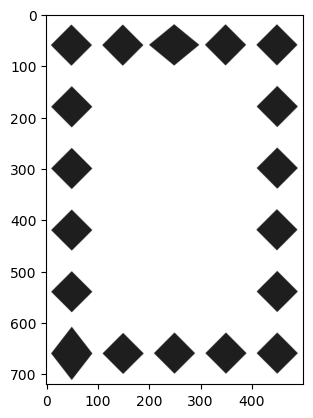

In [491]:
plt.imshow(img)

In [492]:
#finding the index of longest diagonal.
for n in range(len(list3)):
    if list3[n]==max(list3):
        index1=n

In [502]:
def finddiagolengthv(img):
    # Detecting edges
    grayimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    edges = cv.Canny(grayimg, 100, 200)
    height, width = edges.shape
    
    # Finding the coordinate of topmost point of the topmost square
    list1v = [height]
    column = None
    
    for j in range(100):  
        for i in range(height):
            if edges[i, j] == 255:
                if i < list1v[0]:
                    list1v[0] = i
                    column = j  # Store the current column index
    
    # Finding vertical diagonal end points of squares in vertical column by detecting color change
    list2v = [0]
    j = 49  
    counter = 0
    
    for i in range(height):
        value = int(edges[i, j] - edges[list2v[counter], j])
        if value != 0:
            counter += 1
            list2v.append(i)
    
    # Finding the length of vertical diagonal of each square
    list3v = []
    for n in range(6):
        length = int(list2v[4 * n + 3]) - int(list2v[4 * n + 2])
        list3v.append(length)
    
    return list3v

In [494]:
list3v=finddiagolengthv(img)
list3v

<ipython-input-493-c74a35b3a62e>:24: RuntimeWarning: overflow encountered in scalar subtract
  value = int(edges[i, j] - edges[list2v[counter], j])


[78, 77, 77, 77, 77, 100]

In [495]:
max(list3v)

100

In [496]:
#finding the index of longest diagonal.
for n in range(len(list3v)):
    if list3v[n]==max(list3v):
        index2=n

In [497]:
index1,index2

(2, 5)

In [498]:
hdict={0:"Ace",1:'Hearts',2:'Clubs',3:'Spades',4:'Diamonds'}

In [499]:
vdict={1:'2',2:'3',3:'4',4:'5',5:'6'}

In [500]:
###    Output ####

print(f'{vdict[index2]} of {hdict[index1]}')

6 of Clubs
